# Homework Assignment 7
------------------------
## Mindy Tran
**Question 1:** The importance of vaccination! Let's examine what sort of impact
vaccination can make on the outcome of a measles outbreak. Using the measles parameters
I listed in the week 7 notebook ($\beta = 1.5, \gamma = 0.125$), along with the _deterministic_
version of the SIR model, simulate a situation in which a portion of the population is 
vaccinated against the disease. You can do this by altering the proportion of the population that 
begins in the "Recovered" state. Plot SIR dynamics for vaccination rates of 0%, 10%, 50%, and 90%.
Can you find the critical point at which measles can't grow?

In [1]:
import numpy as np
from scipy.integrate import odeint, quad # we will use this to solve ODE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# The SI model differential equations.
def SIR(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N -  gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Contact rate, beta 
beta = 1.5 
# recovery rate, gamma
d = 8
gamma = 1 / d

# Total population, N.
N = 1000
# Initial number of infected and susceptible individuals, I0 and R0.
I0 = 1

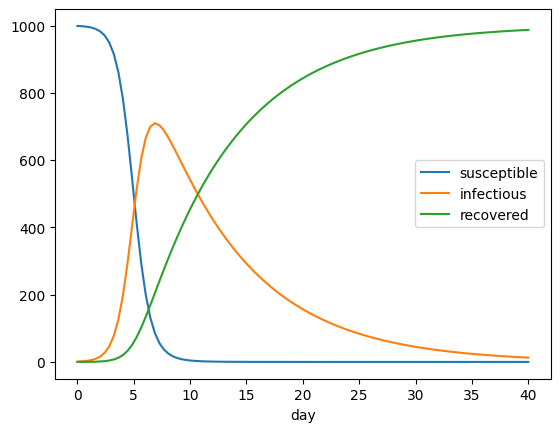

In [3]:
R0 = 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

# A grid of time points (in days)
t = np.linspace(0, d*5, 100)

# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SI equations over the time grid, t.
# this does the hard work for us
ret = odeint(SIR, y0, t, args=(N, beta, gamma))
S, I, R = ret.T  # divide through by N to get proportions
df = pd.DataFrame({"susceptible":S, "infectious":I, "recovered":R},index=t)
df.index.name="day"
df.plot();

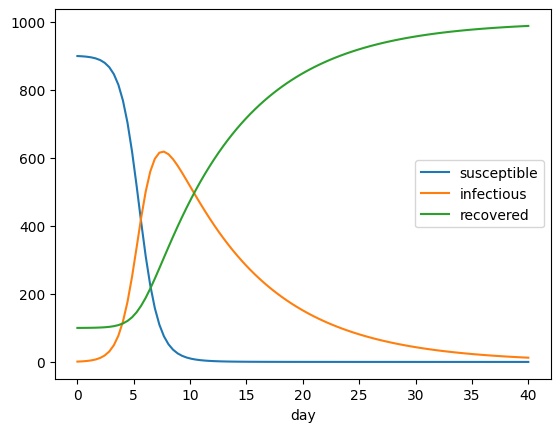

In [4]:
R0 = N * 0.1
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

# A grid of time points (in days)
t = np.linspace(0, d*5, 100)

# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SI equations over the time grid, t.
# this does the hard work for us
ret = odeint(SIR, y0, t, args=(N, beta, gamma))
S, I, R = ret.T  # divide through by N to get proportions
df = pd.DataFrame({"susceptible":S, "infectious":I, "recovered":R},index=t)
df.index.name="day"
df.plot();

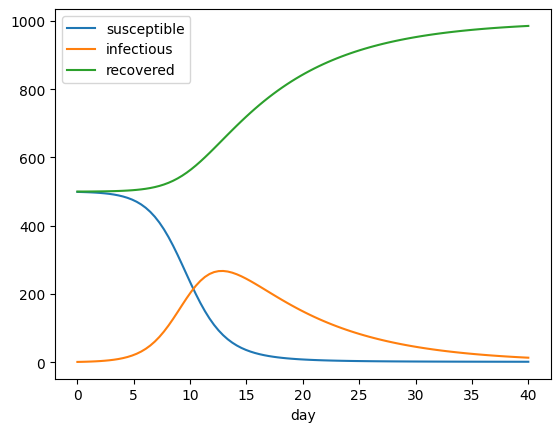

In [5]:
R0 = N * 0.5
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

# A grid of time points (in days)
t = np.linspace(0, d*5, 100)

# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SI equations over the time grid, t.
# this does the hard work for us
ret = odeint(SIR, y0, t, args=(N, beta, gamma))
S, I, R = ret.T  # divide through by N to get proportions
df = pd.DataFrame({"susceptible":S, "infectious":I, "recovered":R},index=t)
df.index.name="day"
df.plot();

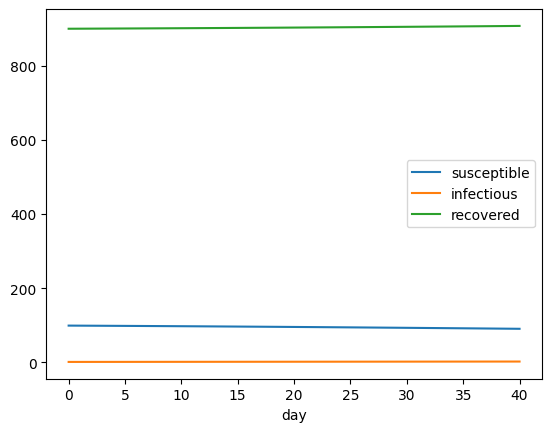

In [6]:
R0 = N * 0.9
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

# A grid of time points (in days)
t = np.linspace(0, d*5, 100)

# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SI equations over the time grid, t.
# this does the hard work for us
ret = odeint(SIR, y0, t, args=(N, beta, gamma))
S, I, R = ret.T  # divide through by N to get proportions
df = pd.DataFrame({"susceptible":S, "infectious":I, "recovered":R},index=t)
df.index.name="day"
df.plot();

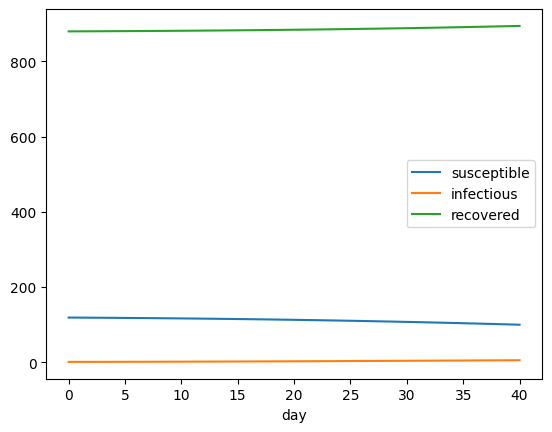

In [16]:
R0 = N * 0.88
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

# A grid of time points (in days)
t = np.linspace(0, d*5, 100)

# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SI equations over the time grid, t.
# this does the hard work for us
ret = odeint(SIR, y0, t, args=(N, beta, gamma))
S, I, R = ret.T  # divide through by N to get proportions
df = pd.DataFrame({"susceptible":S, "infectious":I, "recovered":R},index=t)
df.index.name="day"
df.plot();

*Can you find the critical point at which measles can't grow?*

Measels cannot grow if 88-89% of the population is vaccinated.

**Question 2:** The SEIR model is a slightly more complex compartment model of 
contagion in which some portion of the population has been Exposed, but not yet
infectious. Individuals move from Susceptible to Exposed at the same rate as S->I
in the SIR model, but now there is an incubation time $\alpha$ which determines
the rate at which individuals move from Exposed to Infectious. The dynamics of the system
look like this

\begin{align}
\frac{\partial S}{\partial t} &= -\frac{\beta S I}{ N} \\
\frac{\partial E}{\partial t} &= \frac{\beta S I}{ N} - \alpha E \\
\frac{\partial I}{\partial t} &= \alpha E - \gamma I \\
\frac{\partial R}{\partial t} &= \gamma I 
\end{align}


Code up these dynamics and use the deterministic strategy to plot the SEIR model. Do this for both
the measle and COVID parameter sets assuming the incubation rate is $\alpha = 0.2$ corresponding to an average of 5 day incubation period.

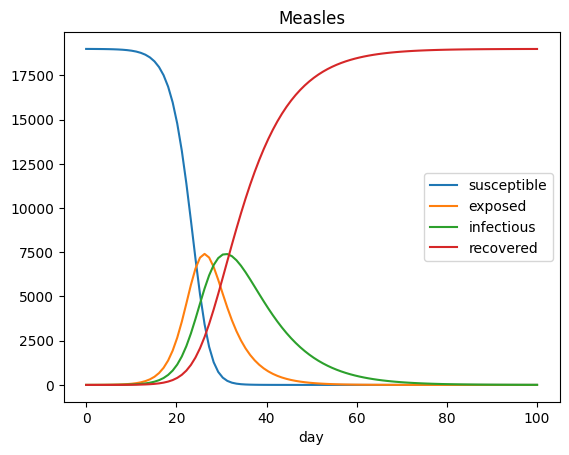

In [32]:
# The SI model differential equations.
def SEIR(y, t, N, alpha, beta, gamma):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = (beta*S*I / N) - (alpha*E)
    dIdt = alpha*E - gamma*I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

# Contact rate, beta 
beta = 1.5
# incubation time, alpha
alpha = 0.2
# recovery rate, gamma
gamma = 0.125

N = 19000 # population size
E0 = 0
I0 = 1
R0 = 0
S0 = N - I0
y0 = S0, I0, R0


# A grid of time points (in days)
t = np.linspace(0, 100, 100)

# Initial conditions vector
y0 = S0, E0, I0, R0

# Integrate the SI equations over the time grid, t.
# this does the hard work for us
ret = odeint(SEIR, y0, t, args=(N, alpha, beta, gamma))
S, E, I, R = ret.T  # divide through by N to get proportions
df = pd.DataFrame({"susceptible":S, "exposed":E, "infectious":I, "recovered":R},index=t)
df.index.name="day"
df.plot(title='Measles');

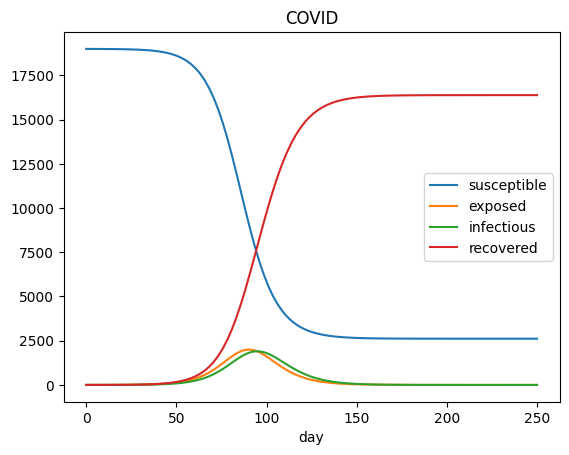

In [35]:
R0 = 2.3
d = 5
gamma = 1 / d
beta = R0 * gamma 
# incubation time, alpha
alpha = 0.2

N = 19000 # population size
E0 = 0
I0 = 1
R0 = 0
S0 = N - I0
# Initial conditions vector
y0 = S0, E0, I0, R0

t = np.linspace(0, d*50, 100)

# Integrate the SI equations over the time grid, t.
# this does the hard work for us
ret = odeint(SEIR, y0, t, args=(N, alpha, beta, gamma))
S, E, I, R = ret.T  # divide through by N to get proportions
df = pd.DataFrame({"susceptible":S, "exposed":E, "infectious":I, "recovered":R},index=t)
df.index.name="day"
df.plot(title='COVID');